In [1]:
import numpy as np
from utils_predictions_manipulation import*
from utils_nans_manipulation import*
from cross_validation import*
from utils_data_loading import*
from utils_features_manipulation import*
import random

### Loading data

In [42]:
traindata,_ = load_data('Data/train.csv')

X_total, Y_total = structure_data(traindata)

X_total = replace_bad_data_with_nans(X_total, -999)

X_total, col = replace_nans_with_median(X_total, threshold=0.5)

X_total = X_total + np.random.rand(X_total.shape[0], X_total.shape[1])/10000

degree_test = [1/30, 1/20, 1/10, 1/5, 1/4, 1/3, 1/2, 1, 2, 3, 4, 5, 10, 20, 30]
degree = [degree_test for i in index_list]

X_poly = build_poly_index(X_nans, index, degree)

In [43]:
thresh = [[23, 0.5],
          [23, 1.5],
          [23, 2.5],
          [12, 0],
          [13, 0.5]]

X_sets, Y_sets, thresholds = split_data_set(X_total, Y_total, thresh)

In [44]:
points_x = []
points_y = []
for i in range(len(X_sets)):
    X_set = X_sets[i]
    Y_set = Y_sets[i]
    
    acc = 0
    acc2 = 0
    print(thresholds[i])
    for j in range(len(X_set)):
        X_split = X_set[j]
        Y_split = Y_set[j]
        
        dtmp_tr,dtmp_te = cross_validation(Y_split, X_split, k_fold=4, seed=1, function_name='least_squares')
        
        acc = acc + dtmp_tr*(X_split.shape[0]/X_total.shape[0])
        
        if dtmp_tr>0.3:
            acc2 = acc2 + dtmp_tr*(X_split.shape[0]/X_total.shape[0])
        else:
            select = max([sum(Y_split/Y_split.shape[0]), 1-sum(Y_split/Y_split.shape[0])])
            acc2 = acc2 + select*(Y_split.shape[0]/Y_total.shape[0])
            
        print(X_split.shape[0], "\t", dtmp_tr, dtmp_te, "\t", sum(Y_split/Y_split.shape[0])+dtmp_tr)
        points_x.append(sum(Y_split/Y_split.shape[0]))
        points_y.append(dtmp_tr)
    print("TOTAL:", acc)
    print("ARTIF:", acc2, "\n")

([23, 0.5],)
150087 	 0.6921990352069507 0.6919391807254605 	 1.0931331600814955
99913 	 0.816682013505218 0.8166386420049644 	 1.0718239870221349
TOTAL: 0.7419489064498098
ARTIF: 0.7419489064498098 

([23, 1.5],)
150087 	 0.6921990352069507 0.6919391807254605 	 1.0931331600814955
99913 	 0.816682013505218 0.8166386420049644 	 1.0718239870221349
TOTAL: 0.7419489064498098
ARTIF: 0.7419489064498098 

([23, 2.5],)
150087 	 0.6921990352069507 0.6919391807254605 	 1.0931331600814955
99913 	 0.816682013505218 0.8166386420049644 	 1.0718239870221349
TOTAL: 0.7419489064498098
ARTIF: 0.7419489064498098 

([12, 0],)
123934 	 0.7343597026326265 0.7339186005228674 	 1.074040500476666
126066 	 0.7338706265600542 0.7336908237085924 	 1.0794753098213503
TOTAL: 0.7341130791759669
ARTIF: 0.7341130791759669 

([13, 0.5],)
250000 	 0.7338933333333333 0.7339079999999999 	 1.0765613333335933
TOTAL: 0.7338933333333333
ARTIF: 0.7338933333333333 

([23, 0.5], [23, 1.5])
150087 	 0.6921990352069507 0.691939180

75411 	 0.694090812645873 0.6938521111818374 	 1.0982228358252886
49258 	 0.8188782415678632 0.8180323209355206 	 1.0705936989555134
50655 	 0.8141369870225591 0.8135710337202875 	 1.0726109777441457
TOTAL: 0.741925983092862
ARTIF: 0.741925983092862 



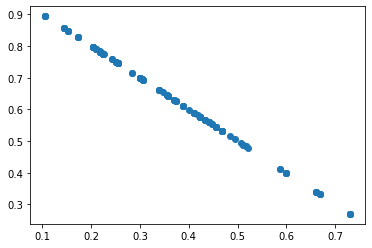

In [89]:
import matplotlib.pyplot as plt
plt.scatter(points_x, points_y)

In [15]:
np.linalg.matrix_rank(X_sets[0][1])

19

In [16]:
.shape

(99913, 24)

In [23]:
test = X_total#X_sets[0][1]
for i in range(test.shape[1]):
    print(test[:,i])

[1. 1. 1. ... 1. 1. 1.]
[138.47      160.937     112.9013159 ... 105.457      94.951
 112.9013159]
[ 51.655  68.768 162.172 ...  60.526  19.362  72.756]
[ 97.827 103.235 125.953 ...  75.839  68.812  70.831]
[27.98  48.146 35.635 ... 39.757 13.504  7.479]
[3.064 3.473 3.148 ... 2.39  3.365 2.025]
[41.928  2.078  9.336 ... 22.183 13.504  7.479]
[197.76  125.157 197.814 ... 120.462  55.859  83.24 ]
[1.582 0.879 3.776 ... 1.202 0.999 0.936]
[ 1.396  1.414  1.414 ...  0.529  1.414 -1.411]
[32.638 42.014 32.154 ... 35.636 27.944 43.003]
[ 1.017  2.039 -0.705 ... -0.266 -2.211  1.685]
[ 0.381 -3.011 -2.093 ... -3.132  2.792  2.653]
[ 51.626  36.918 121.409 ...  42.834  27.915  40.236]
[ 2.273  0.501 -0.953 ...  0.381 -0.874  1.49 ]
[-2.414  0.103  1.052 ...  0.851 -0.296  0.637]
[16.824 44.704 54.283 ... 23.419 12.15  40.729]
[-0.277 -1.916 -2.186 ... -2.89   0.811 -1.596]
[258.733 164.546 260.414 ... 198.907 112.718  99.405]
[2. 1. 1. ... 1. 0. 0.]
[67.435      46.226      44.251      ... 41

In [26]:
X_total[:,19]

array([-2.414,  0.103,  1.052, ...,  0.851, -0.296,  0.637])

In [25]:
test = X_total#X_sets[0][1]
for i in range(test.shape[1]):
    print(test[:,i])

[1. 1. 1. ... 1. 1. 1.]
[138.47  160.937     nan ... 105.457  94.951     nan]
[ 51.655  68.768 162.172 ...  60.526  19.362  72.756]
[ 97.827 103.235 125.953 ...  75.839  68.812  70.831]
[27.98  48.146 35.635 ... 39.757 13.504  7.479]
[0.91  nan  nan ...  nan  nan  nan]
[124.711     nan     nan ...     nan     nan     nan]
[2.666   nan   nan ...   nan   nan   nan]
[3.064 3.473 3.148 ... 2.39  3.365 2.025]
[41.928  2.078  9.336 ... 22.183 13.504  7.479]
[197.76  125.157 197.814 ... 120.462  55.859  83.24 ]
[1.582 0.879 3.776 ... 1.202 0.999 0.936]
[ 1.396  1.414  1.414 ...  0.529  1.414 -1.411]
[0.2 nan nan ... nan nan nan]
[32.638 42.014 32.154 ... 35.636 27.944 43.003]
[ 1.017  2.039 -0.705 ... -0.266 -2.211  1.685]
[ 0.381 -3.011 -2.093 ... -3.132  2.792  2.653]
[ 51.626  36.918 121.409 ...  42.834  27.915  40.236]
[ 2.273  0.501 -0.953 ...  0.381 -0.874  1.49 ]
[-2.414  0.103  1.052 ...  0.851 -0.296  0.637]
[16.824 44.704 54.283 ... 23.419 12.15  40.729]
[-0.277 -1.916 -2.186 ... -2